In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


## Importing the Dependencies

-----------------------

In [2]:
import sklearn as sk
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [3]:
from sklearn.linear_model import LogisticRegression

# Heart_Rate_Prediction

----------------------------------------------

## Introduction
---------------------

1. This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. 
2. In particular, the Cleveland database is the only one that has been used by ML researchers to  this date. 
3. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

## Feature Information

-------------------------------

1. age
2. sex
3. cp -> chest pain type (4 values)
4. trestbps -> resting blood pressure
5. chol-> serum cholestoral in mg/dl
6. fbs -> fasting blood sugar > 120 mg/dl
7. restcg -> resting electrocardiographic results (values 0,1,2)
8. thalach -> maximum heart rate achieved
9. exang -> exercise induced angina
10. oldpeak  -> ST depression induced by exercise relative to rest
11. slope -> the slope of the peak exercise ST segment
12. ca -> number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## Data Colection and Pre-Processing

----------------------------

In [4]:
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
df = df.astype({"sex":'category',"cp":'category',"fbs":'category',\
                "restecg":'category',"exang":'category',"slope":'category',"ca":'category',"thal":'category',"target":'category'})

In [9]:
df.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 16.0 KB


## Statistical Measure about data

-----------------------

In [11]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.0,303.0,303.000000,303.000000,303.0,303.0,303.000000,303.0,303.000000,303.0,303.0,303.0,303.0
unique,NaN,2.0,4.0,NaN,NaN,2.0,3.0,NaN,2.0,NaN,3.0,5.0,4.0,2.0
top,NaN,1.0,0.0,NaN,NaN,0.0,1.0,NaN,0.0,NaN,2.0,0.0,2.0,1.0
freq,NaN,207.0,143.0,NaN,NaN,258.0,152.0,NaN,204.0,NaN,142.0,175.0,166.0,165.0
mean,54.366337,NaN,NaN,131.623762,246.264026,NaN,NaN,149.646865,NaN,1.039604,NaN,NaN,NaN,NaN
std,9.082101,NaN,NaN,17.538143,51.830751,NaN,NaN,22.905161,NaN,1.161075,NaN,NaN,NaN,NaN
min,29.000000,NaN,NaN,94.000000,126.000000,NaN,NaN,71.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,47.500000,NaN,NaN,120.000000,211.000000,NaN,NaN,133.500000,NaN,0.000000,NaN,NaN,NaN,NaN
50%,55.000000,NaN,NaN,130.000000,240.000000,NaN,NaN,153.000000,NaN,0.800000,NaN,NaN,NaN,NaN
75%,61.000000,NaN,NaN,140.000000,274.500000,NaN,NaN,166.000000,NaN,1.600000,NaN,NaN,NaN,NaN


<AxesSubplot:>

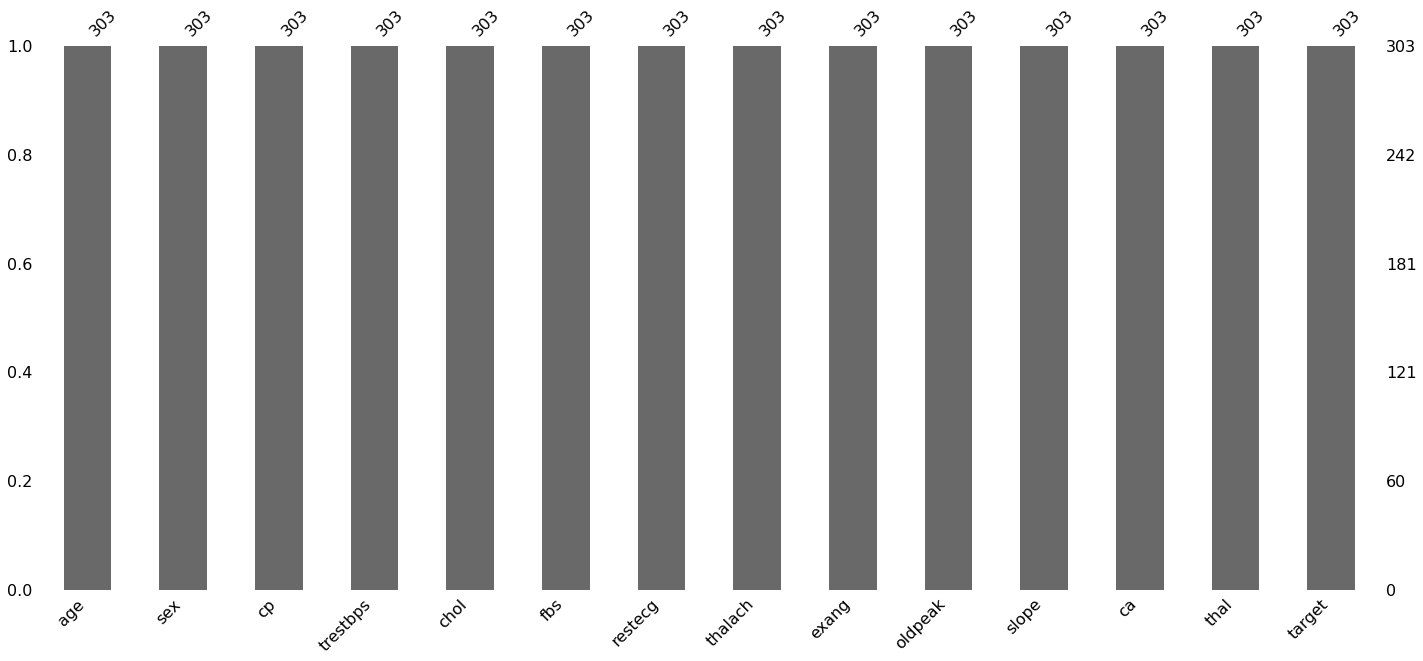

In [12]:
msno.bar(df)

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")

<AxesSubplot:>

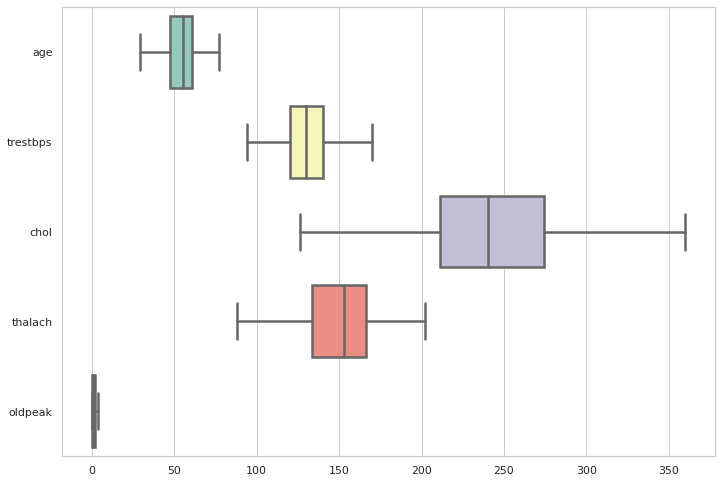

In [14]:
sns.boxplot(data=df,palette="Set3",linewidth=2.5,orient="h",showfliers=False)

Text(0, 0.5, 'Count')

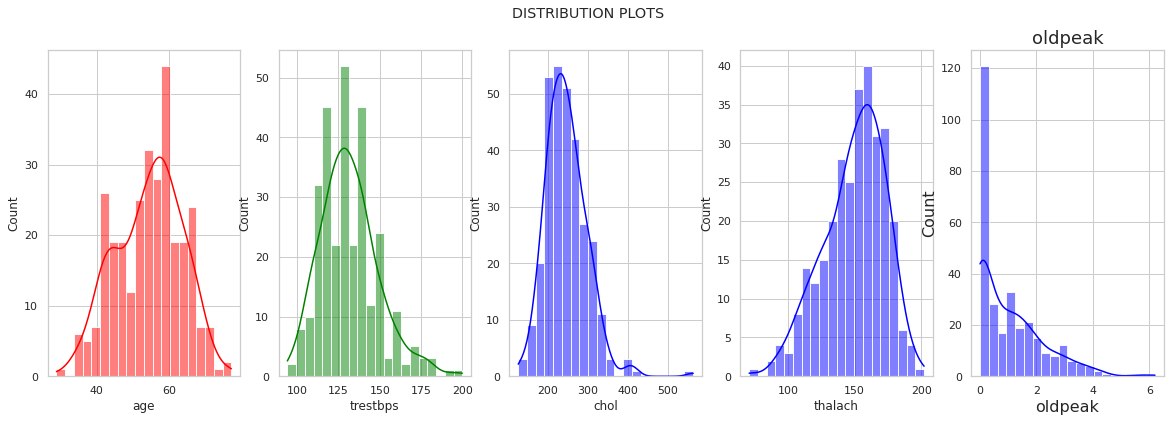

In [15]:
vals =['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig, ax = plt.subplots(1,5,figsize=(20,6))
plt.suptitle('DISTRIBUTION PLOTS')
# Histogram Plot for distribution and skewness
sns.histplot(df['age'], kde=True, color='red', bins=20,ax=ax[0]) #Age
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)

sns.histplot(df['trestbps'], kde=True, color='green', bins=20,ax=ax[1]) #Credit amount 
plt.title('trestbps', fontsize=18)
plt.xlabel('trestbps', fontsize=16)
plt.ylabel('Count', fontsize=16)

sns.histplot(df['chol'], kde=True, color='blue', bins=20,ax=ax[2])#Duration
plt.title('chol', fontsize=18)
plt.xlabel('chol', fontsize=16)
plt.ylabel('Count', fontsize=16)

sns.histplot(df['thalach'], kde=True, color='blue', bins=20,ax=ax[3])#Duration
plt.title('thalach', fontsize=18)
plt.xlabel('thalach', fontsize=16)
plt.ylabel('Count', fontsize=16)

sns.histplot(df['oldpeak'], kde=True, color='blue', bins=20,ax=ax[4])#Duration
plt.title('oldpeak', fontsize=18)
plt.xlabel('oldpeak', fontsize=16)
plt.ylabel('Count', fontsize=16)

<AxesSubplot:xlabel='target', ylabel='count'>

<Figure size 1080x720 with 0 Axes>

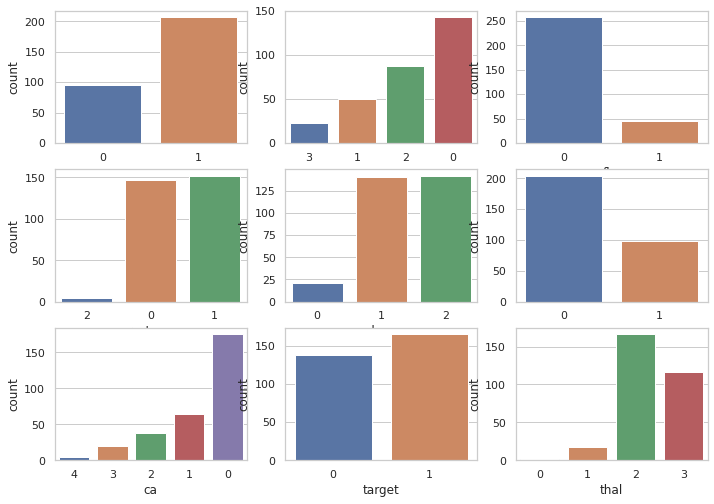

In [16]:
plt.figure(figsize=(15, 10))
f, axes = plt.subplots(3, 3)
sex = df['sex']
sns.countplot(x= sex ,data =df,orient='v', ax=axes[0][0])#box plot fot sex column
cp = df['cp']
sns.countplot(x= cp ,data =df,order=cp.value_counts().sort_values().index,orient='v', ax=axes[0][1])#box plot fot job column
fbs = df['fbs']
sns.countplot(x= fbs ,data =df,orient='v', ax=axes[0][2])#box plot fot sex column
restecg = df['restecg']
sns.countplot(x= restecg ,data =df,order=restecg.value_counts().sort_values().index,orient='v', ax=axes[1][0])#box plot fot job column
exang = df['exang']
sns.countplot(x= exang ,data =df,orient='v', ax=axes[1][2])#box plot fot sex column
slope = df['slope']
sns.countplot(x= slope ,data =df,order=slope.value_counts().sort_values().index,orient='v', ax=axes[1][1])#box plot fot job column
ca = df['ca']
sns.countplot(x= ca ,data =df,order=ca.value_counts().sort_values().index,orient='v', ax=axes[2][0])#box plot fot job column
thal = df['thal']
sns.countplot(x= thal ,data =df,orient='v', ax=axes[2][2])#box plot fot sex column
target = df['target']
sns.countplot(x= target ,data =df,order=target.value_counts().sort_values().index,orient='v', ax=axes[2][1])#box plot fot job column

## Spliting the Features and Target

In [17]:
X= df.drop(columns='target',axis=1)
Y=df['target']

In [18]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: category
Categories (2, int64): [0, 1]

## Spliting the data into training data and test data

In [20]:
labels = Y
features =X
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, stratify=labels,random_state = 2)

In [21]:
test_labels

255    0
72     1
83     1
268    0
92     1
      ..
42     1
187    0
8      1
122    1
19     1
Name: target, Length: 61, dtype: category
Categories (2, int64): [0, 1]

In [22]:
train_labels

61     1
238    0
160    1
158    1
289    0
      ..
100    1
49     1
300    0
194    0
131    1
Name: target, Length: 242, dtype: category
Categories (2, int64): [0, 1]

In [23]:
train_features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2


In [24]:
test_features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2


In [25]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 255 to 19
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       61 non-null     int64   
 1   sex       61 non-null     category
 2   cp        61 non-null     category
 3   trestbps  61 non-null     int64   
 4   chol      61 non-null     int64   
 5   fbs       61 non-null     category
 6   restecg   61 non-null     category
 7   thalach   61 non-null     int64   
 8   exang     61 non-null     category
 9   oldpeak   61 non-null     float64 
 10  slope     61 non-null     category
 11  ca        61 non-null     category
 12  thal      61 non-null     category
dtypes: category(8), float64(1), int64(4)
memory usage: 4.6 KB


## Model Training

_____________________________

In [26]:
model = LogisticRegression(solver='liblinear')

In [27]:
model.fit(train_features, train_labels);

## Model Evaluation

### Accuracy Score

In [28]:
predictions = model.predict(train_features)

In [29]:
training_data_accuracy =  accuracy_score(predictions,train_labels)

In [30]:
training_data_accuracy

0.8553719008264463

In [31]:
predictions_test = model.predict(test_features)
test_data_accuracy =  accuracy_score(predictions_test,test_labels)
test_data_accuracy

0.8032786885245902

## Building a Predictive System

In [32]:
input_data=(37,1,2,130,250,0,1,187,0,3.5,0,0,2)

input_data_as_numpy_array=np.asarray(input_data)

input_data_as_numpy_array_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_as_numpy_array_reshaped)

prediction

if (prediction[0]==0):
    print('The pesron has at that point less chances of heart risk.')
else:
    print('The pesron has at that point chances of heart risk.')


The pesron has at that point chances of heart risk.
